In [2]:
import moviepy.editor as mp
clip = mp.VideoFileClip("unprocessed_videos/Nike Antwerpen_ch1_20240221130751_20240221131001.mp4")
clip = clip.set_fps(20)
clip_resized = clip.resize(height=720) # make the height 720px ( According to moviePy documenation The width is then computed so that the width/height ratio is conserved.)

clip_resized.write_videofile("processed_videos/Nike Antwerpen_ch1_20240221130751_20240221131001_resized.mp4")


clip = mp.VideoFileClip("unprocessed_videos/Nike Antwerpen_ch2_20240221130751_20240221131001.mp4")
clip = clip.set_fps(20)
clip_resized = clip.resize(height=720) # make the height 720px ( According to moviePy documenation The width is then computed so that the width/height ratio is conserved.)

clip_resized.write_videofile("processed_videos/Nike Antwerpen_ch2_20240221130751_20240221131001_resized.mp4")

Moviepy - Building video processed_videos/Nike Antwerpen_ch1_20240221130751_20240221131001_resized.mp4.
Moviepy - Writing video processed_videos/Nike Antwerpen_ch1_20240221130751_20240221131001_resized.mp4



Moviepy - Done !
Moviepy - video ready processed_videos/Nike Antwerpen_ch1_20240221130751_20240221131001_resized.mp4
Moviepy - Building video processed_videos/Nike Antwerpen_ch2_20240221130751_20240221131001_resized.mp4.
Moviepy - Writing video processed_videos/Nike Antwerpen_ch2_20240221130751_20240221131001_resized.mp4



Moviepy - Done !
Moviepy - video ready processed_videos/Nike Antwerpen_ch2_20240221130751_20240221131001_resized.mp4


In [5]:
import cv2
import numpy as np

video1 = cv2.VideoCapture("Nike Antwerpen_ch1_20240221130751_20240221131001_resized.mp4")
video2 = cv2.VideoCapture("Nike Antwerpen_ch2_20240221130751_20240221131001_resized.mp4")

frame_width = int(video1.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video1.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = int(video1.get(cv2.CAP_PROP_FPS))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, frame_rate, (frame_width * 2, frame_height))

while True:
    ret1, frame1 = video1.read()

    ret2, frame2 = video2.read()

    if not ret1 or not ret2:
        break

    frame2 = cv2.resize(frame2, (frame_width, frame_height))

    canvas = np.zeros((frame_height, frame_width *2, 3), dtype=np.uint8)

    canvas[:, :frame_width] = frame1
    canvas[:, frame_width:] = frame2

    out.write(canvas)

video1.release()
video2.release()
out.release()

In [6]:
from ultralytics import YOLO

# Configure the tracking parameters and run the tracker
model = YOLO('yolov8x.pt')
results = model.track(source="D:/nike downloads/Antwerpen_07-05_1400-1500/Nike Antwerpen_ch14_20240506140000_20240506143000.mp4", conf=0.3, iou=0.5, show=True, tracker="bytetrack.yaml")
display(results)




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/45010) D:\nike downloads\Antwerpen_07-05_1400-1500\Nike Antwerpen_ch14_20240506140000_20240506143000.mp4: 384x640 1 person, 960.8ms
video 1/1 (2/45010) D:\nike downloads\Antwerpen_07-05_1400-1500\Nike Antwerpen_ch14_20240506140000_20240506143000.mp4: 384x640 1 person, 1 airplane, 964.0ms
video 1/1 (3/45010) D:\nike downloads\Antwerpen_07-05_1400-1500\Nike Antwerpen_ch14_20240506140000_20240506143000.mp4: 384x640 1 person, 1353.2ms
video 1/

KeyboardInterrupt: 

In [5]:
for r in results:
    boxes = r.boxes
boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.7999])
data: tensor([[454.9930, 244.1233, 522.7369, 405.1803,   1.0000,   0.7999,   0.0000]])
id: tensor([1.])
is_track: True
orig_shape: (720, 1280)
shape: torch.Size([1, 7])
xywh: tensor([[488.8650, 324.6518,  67.7439, 161.0570]])
xywhn: tensor([[0.3819, 0.4509, 0.0529, 0.2237]])
xyxy: tensor([[454.9930, 244.1233, 522.7369, 405.1803]])
xyxyn: tensor([[0.3555, 0.3391, 0.4084, 0.5628]])

In [2]:
%timeit -r1
import cv2
from ultralytics import YOLO
import numpy as np

# provide points from image 1
pts_src = np.array([[1131, 762], [287, 472], [77, 925],[1750, 939], [1058, 529], [68, 415]
                    ])
# corresponding points from image 2 (i.e. (154, 174) matches (212, 80))
pts_dst = np.array([[2381, 544],[2352, 238],[2222, 387],[2389, 647], [2431,481], [2330, 29]
                    ])

# calculate matrix H
h2, status2 = cv2.findHomography(pts_src, pts_dst)

# provide points from image 1
pts_src = np.array([[1629, 154], [1135, 534], [1998, 1186],[238, 609], [271, 277], [923, 405], [1068, 155]
                    ])
# corresponding points from image 2 (i.e. (154, 174) matches (212, 80))
pts_dst = np.array([[2330, 29],[2222, 387],[2381, 544],[2034, 455], [1763,181], [2134, 328], [2130, 68]
                    ])

# calculate matrix H
h3, status2 = cv2.findHomography(pts_src, pts_dst)


# provide points from image 1
pts_src = np.array([[490, 650], [1704, 1200], [2059, 455], [1863, 136], 
                    # [962, 1373], [913, 806]
                    ])
# corresponding points from image 2 (i.e. (154, 174) matches (212, 80))
pts_dst = np.array([[1975, 704],[2034, 455],[1700, 417], [1359, 525],
                    #  [88,258], [27, 223]
                    ])

# calculate matrix H
h4, status1 = cv2.findHomography(pts_src, pts_dst)

# provide points from image 1
pts_src = np.array([[468, 604], [1584, 224], [118, 797], [1251, 384], [1029, 1113]
                    # [465, 476]
                    # [913, 806]
                    ])
# corresponding points from image 2 (i.e. (154, 174) matches (212, 80))
pts_dst = np.array([[2132, 324],[1840, 151],[2224, 358],[1986, 208], [2215,142]
                    # [2084,337]
                    # [27, 223]
                    ])

# calculate matrix H
h5, status1 = cv2.findHomography(pts_src, pts_dst)

# provide points from image 1
pts_src = np.array([[919, 1311], [886, 427], [313, 1305], [19, 438], 
                    # [219, 808], 
                    # [913, 806]
                    ])
# corresponding points from image 2 (i.e. (154, 174) matches (212, 80))
pts_dst = np.array([[1840, 151],[1674, 415],[1909, 206],[1920, 706], 
                    # [1879,334], 
                    # [27, 223]
                    ])

# calculate matrix H
h6, status1 = cv2.findHomography(pts_src, pts_dst)

# provide points from image 1
pts_src = np.array([[1605, 926], [435, 494], [316, 1368], [220, 289], [2152, 630], 
                    # [913, 806]
                    ])
# corresponding points from image 2 (i.e. (154, 174) matches (212, 80))
pts_dst = np.array([[1984, 238],[1702, 415],[2031, 481],[1359, 525], [1973,35], 
                    # [27, 223]
                    ])

# calculate matrix H
h7, status1 = cv2.findHomography(pts_src, pts_dst)

# provide points from image 1
pts_src = np.array([[1317, 337], [2172, 898], [2173, 467], [2080, 340], [279, 53], 
                    # [913, 806]
                    ])
# corresponding points from image 2 (i.e. (154, 174) matches (212, 80))
pts_dst = np.array([[1700, 413],[2032, 455],[1909, 240],[1842, 151], [467,618], 
                    # [27, 223]
                    ])

# calculate matrix H
h8, status1 = cv2.findHomography(pts_src, pts_dst)

# provide points from image 1
pts_src = np.array([[626, 509], [1917, 110], [1108, 382], [2389, 177],
                    #  [376, 699], [272, 384]
                    ])
# corresponding points from image 2 (i.e. (154, 174) matches (212, 80))
pts_dst = np.array([[1428, 415],[2034, 455],[1556, 432],[2392, 647],
                    #  [1388,435], [1379, 251]
                    ])

# calculate matrix H
h9, status1 = cv2.findHomography(pts_src, pts_dst)

# provide points from image 1
pts_src = np.array([[1399, 107], [2050, 377], [1175, 303], [1871, 3],
                    #  [376, 699], [272, 384]
                    ])
# corresponding points from image 2 (i.e. (154, 174) matches (212, 80))
pts_dst = np.array([[1907, 236],[1671, 415],[1691, 144],[2376, 647],
                    #  [1388,435], [1379, 251]
                    ])

# calculate matrix H
h10, status1 = cv2.findHomography(pts_src, pts_dst)

# provide points from image 1
pts_src = np.array([[130, 916], [963, 367], [2343, 323], [1228, 35],
                    #  [376, 699], [272, 384]
                    ])
# corresponding points from image 2 (i.e. (154, 174) matches (212, 80))
pts_dst = np.array([[1438, 415],[1287, 708],[609, 804],[1202, 706],
                    #  [1388,435], [1379, 251]
                    ])

# calculate matrix H
h11, status1 = cv2.findHomography(pts_src, pts_dst)

# provide points from image 1
pts_src = np.array([[127, 518], [1910, 429], [1398, 349], [2553, 798],
                    #  [376, 699], [272, 384]
                    ])
# corresponding points from image 2 (i.e. (154, 174) matches (212, 80))
pts_dst = np.array([[689, 354],[1272, 208],[1091, 199],[1434, 415],
                    #  [1388,435], [1379, 251]
                    ])

# calculate matrix H
h12, status1 = cv2.findHomography(pts_src, pts_dst)

# provide points from image 1
pts_src = np.array([[916, 263], [718, 271], [391, 284], [834, 209],[46, 313], [1273, 1160]
                    #  [376, 699], [272, 384]
                    ])
# corresponding points from image 2 (i.e. (154, 174) matches (212, 80))
pts_dst = np.array([[449, 437],[469, 505],[467, 669],[373, 503],[408, 1031], [833, 251]
                    #  [1388,435], [1379, 251]
                    ])

# calculate matrix H
h13, status1 = cv2.findHomography(pts_src, pts_dst)

# provide points from image 1
pts_src = np.array([[1739, 239], [2072, 161], [1622, 196], [2021, 140],
                    #  [376, 699], [272, 384]
                    ])
# corresponding points from image 2 (i.e. (154, 174) matches (212, 80))
pts_dst = np.array([[960, 195],[1274, 238],[958, 142],[1274, 208],
                    #  [1388,435], [1379, 251]
                    ])

# calculate matrix H
h14, status1 = cv2.findHomography(pts_src, pts_dst)

# provide points from image 1
pts_src = np.array([[775, 445], [993, 393], [2266, 582], [2542, 626],[2232,984]
                    #  [376, 699], [272, 384]
                    ])
# corresponding points from image 2 (i.e. (154, 174) matches (212, 80))
pts_dst = np.array([[807, 1033],[740, 1036],[471, 802],[408, 749],[609,747]
                    #  [1388,435], [1379, 251]
                    ])

# calculate matrix H
h15, status1 = cv2.findHomography(pts_src, pts_dst)

# provide points from image 1
pts_src = np.array([[472, 379], [754, 285], [2187, 589], [853, 219],
                    #  [376, 699], [272, 384]
                    ])
# corresponding points from image 2 (i.e. (154, 174) matches (212, 80))
pts_dst = np.array([[408, 747],[469, 675],[873, 728],[469, 618],
                    #  [1388,435], [1379, 251]
                    ])

# calculate matrix H
h16, status1 = cv2.findHomography(pts_src, pts_dst)

# provide points from image 1
pts_src = np.array([[864, 389], [2278, 233], [775, 579], [585, 1102],
                    #  [376, 699], [272, 384]
                    ])
# corresponding points from image 2 (i.e. (154, 174) matches (212, 80))
pts_dst = np.array([[379, 439],[956, 142],[375, 505],[377, 620],
                    #  [1388,435], [1379, 251]
                    ])

# calculate matrix H
h17, status1 = cv2.findHomography(pts_src, pts_dst)

# provide points from image 1
pts_src = np.array([[915, 1129], [1246, 1111], [1731, 1069], [1473, 165],
                    #  [376, 699], [272, 384]
                    ])
# corresponding points from image 2 (i.e. (154, 174) matches (212, 80))
pts_dst = np.array([[467, 507],[434, 505],[377, 503],[373, 675],
                    #  [1388,435], [1379, 251]
                    ])

# calculate matrix H
h18, status1 = cv2.findHomography(pts_src, pts_dst)

# provide points from image 1
pts_src = np.array([[1532, 585], [1822, 877], [1693, 1320], [1147, 1149],
                    #  [376, 699], [272, 384]
                    ])
# corresponding points from image 2 (i.e. (154, 174) matches (212, 80))
pts_dst = np.array([[899, 723],[962, 778],[964, 854],[892, 859],
                    #  [1388,435], [1379, 251]
                    ])

# calculate matrix H
h19, status1 = cv2.findHomography(pts_src, pts_dst)

def euclidian_distance(point, other):
     return np.linalg.norm(point-other)

model = YOLO("model_- 15 april 2024 18_14.pt") 
camera2 = cv2.VideoCapture("D:/nike downloads/Gent/Gent_04-04_1030-1100/Nike Gent_ch2_20240404103000_20240404110000.mp4")
camera3 = cv2.VideoCapture("D:/nike downloads/Gent/Gent_04-04_1030-1100/Nike Gent_ch3_20240404103000_20240404110000.mp4")
camera4 = cv2.VideoCapture("D:/nike downloads/Gent/Gent_04-04_1030-1100/Nike Gent_ch4_20240404103000_20240404110000.mp4")
camera5 = cv2.VideoCapture("D:/nike downloads/Gent/Gent_04-04_1030-1100/Nike Gent_ch5_20240404103000_20240404110000.mp4")
camera6 = cv2.VideoCapture("D:/nike downloads/Gent/Gent_04-04_1030-1100/Nike Gent_ch6_20240404103000_20240404110000.mp4")
camera7 = cv2.VideoCapture("D:/nike downloads/Gent/Gent_04-04_1030-1100/Nike Gent_ch7_20240404103000_20240404110000.mp4")
camera8 = cv2.VideoCapture("D:/nike downloads/Gent/Gent_04-04_1030-1100/Nike Gent_ch8_20240404103000_20240404110000.mp4")
camera9 = cv2.VideoCapture("D:/nike downloads/Gent/Gent_04-04_1030-1100/Nike Gent_ch9_20240404103000_20240404110000.mp4")
camera10 = cv2.VideoCapture("D:/nike downloads/Gent/Gent_04-04_1030-1100/Nike Gent_ch10_20240404103000_20240404110000.mp4")
camera11 = cv2.VideoCapture("D:/nike downloads/Gent/Gent_04-04_1030-1100/Nike Gent_ch11_20240404103000_20240404110000.mp4")
camera12 = cv2.VideoCapture("D:/nike downloads/Gent/Gent_04-04_1030-1100/Nike Gent_ch12_20240404103000_20240404110000.mp4")
camera13 = cv2.VideoCapture("D:/nike downloads/Gent/Gent_04-04_1030-1100/Nike Gent_ch13_20240404103000_20240404110000.mp4")
camera14 = cv2.VideoCapture("D:/nike downloads/Gent/Gent_04-04_1030-1100/Nike Gent_ch14_20240404103000_20240404110000.mp4")
camera15 = cv2.VideoCapture("D:/nike downloads/Gent/Gent_04-04_1030-1100/Nike Gent_ch15_20240404103000_20240404110000.mp4")
camera16 = cv2.VideoCapture("D:/nike downloads/Gent/Gent_04-04_1030-1100/Nike Gent_ch16_20240404103000_20240404110000.mp4")
camera17 = cv2.VideoCapture("D:/nike downloads/Gent/Gent_04-04_1030-1100/Nike Gent_ch17_20240404103000_20240404110000.mp4")
camera18 = cv2.VideoCapture("D:/nike downloads/Gent/Gent_04-04_1030-1100/Nike Gent_ch18_20240404103000_20240404110000.mp4")
camera19 = cv2.VideoCapture("D:/nike downloads/Gent/Gent_04-04_1030-1100/Nike Gent_ch19_20240404103000_20240404110000.mp4")
camera_list= [
    camera2,
    camera3,
    camera4,
    camera5,
    camera6,
    camera7,
    camera8,
    camera9,
    camera10,
    camera11,
    camera12,
    camera13,
    camera14,
    camera15,
    camera16,
    camera17,
    camera18,
    camera19,

]
img_counter = 0
count = 0
pointsOut = []
while True:
    ret2, frame2 = camera2.read()
    ret3, frame3 = camera3.read()
    ret4, frame4 = camera4.read()
    ret5, frame5 = camera5.read()
    ret6, frame6 = camera6.read()
    ret7, frame7 = camera7.read()
    ret8, frame8 = camera8.read()
    ret9, frame9 = camera9.read()
    ret10, frame10 = camera10.read()
    ret11, frame11 = camera11.read()
    ret12, frame12 = camera12.read()
    ret13, frame13 = camera13.read()
    ret14, frame14 = camera14.read()
    ret15, frame15 = camera15.read()
    ret16, frame16 = camera16.read()
    ret17, frame17 = camera17.read()
    ret18, frame18 = camera18.read()
    ret19, frame19 = camera19.read()


    ret_list =[
        ret2,
    ret3,
    ret4,
    ret5,
    ret6,
    ret7,
    ret8,
    ret9,
    ret10,
    ret11,
    ret12,
    ret13,
    ret14,
    ret15,
    ret16,
    ret17,
    ret18,
    ret19,
    
    ]

    frame_list= [
                frame2,
    frame3,
    frame4,
    frame5,
    frame6,
    frame7,
    frame8,
    frame9,
    frame10,
    frame11,
    frame12,
    frame13,
    frame14,
    frame15,
    frame16,
    frame17,
    frame18,
    frame19,
                    ]

    if not all(ret_list):
        print("failed to grab frame")
        break
    cv2.imshow("test", frame4)
    # cv2.imshow("test2", frame2)
    # cv2.imshow("test3", frame3)

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    else:
    
        for i, frame in enumerate(frame_list):
            # display(i)
            match i:
                case 0:
                    h= h2
                case 1:
                    h=h3
                case 2:
                    h=h4
                case 3:
                    h= h5
                case 4:
                    h=h6
                case 5:
                    h=h7
                case 6:
                    h= h8
                case 7:
                    h=h9
                case 8:
                    h=h10
                case 9:
                    h= h11
                case 10:
                    h=h12
                case 11:
                    h=h13
                case 12:
                    h= h14
                case 13:
                    h=h15
                case 14:
                    h=h16
                case 15:
                    h= h17
                case 16:
                    h=h18
                case 17:
                    h=h19
            img_path = "callibration_frames/Frame_{}_{}.jpg".format(img_counter, i)
            outs = model.predict(frame, verbose=False)
            boxes = outs[0].boxes
            allpoints=[]
            for j in range(len(boxes)):
                feet = [float(boxes[j].xyxy[0][2] - ((boxes[j].xyxy[0][2] - boxes[j].xyxy[0][0]) /2)), float(boxes[j].xyxy[0][3])]
                feet = [int(x) for x in feet]
                # display(feet)
                allpoints.append(feet)
                colored_frame = cv2.circle(frame, (feet[0], feet[1]), radius=1, color=(0,255,0), thickness=2)
                named_frame = cv2.putText(colored_frame, str(feet), (feet[0] + 10, feet[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1, cv2.LINE_AA)
            cv2.imwrite(img_path, frame)
            # cv2.imshow("valid", named_frame)
            # cv2.imwrite(img_path, named_frame)
            allpoints_np = np.array(allpoints, dtype='float32')
            allpoints_np = np.array([allpoints_np])
            if len(allpoints)>0:
                pointsOut_frame = cv2.perspectiveTransform(allpoints_np, h)
                for point in pointsOut_frame[0]:
                    if len(pointsOut) == 0:
                        pointsOut.append(point)
                    distances = [euclidian_distance(p, point) for p in pointsOut]
                    if all([i> 10 for i in distances]):
                        pointsOut.append(point)
                    # display(distances)
        img_counter += 1
        count += 25
        print(count)
        for camera in camera_list:
            camera.set(cv2.CAP_PROP_POS_FRAMES, count)


camera2.release()
camera3.release()
camera5.release()

camera4.release()

camera6.release()
camera7.release()
camera8.release()
camera9.release()
camera10.release()
camera11.release()
camera12.release()
camera13.release()
camera14.release()
camera15.release()
camera16.release()
camera17.release()
camera18.release()
camera19.release()

25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475
500
525
550
575
600
625
650
675
700
725
750
775
800
825
850
875
900
925
950
975
1000
1025
1050
1075
1100
1125
1150
1175
1200
1225
1250
1275
1300
1325
1350
1375
1400
1425
1450
1475
1500
1525
1550
1575
1600
1625
1650
1675
1700
1725
1750
1775
1800
1825
1850
1875
1900
1925
1950
1975
2000
2025
2050
2075
2100
2125
2150
2175
2200
2225
2250
2275
2300
2325
2350
2375
2400
2425
2450
2475
2500
2525
2550
2575
2600
2625
2650
2675
2700
2725
2750
2775
2800
2825
2850
2875
2900
2925
2950
2975
3000
3025
3050
3075
3100
3125
3150
3175
3200
3225
3250
3275
3300
3325
3350
3375
3400
3425
3450
3475
3500
3525
3550
3575
3600
3625
3650
3675
3700
3725
3750
3775
3800
3825
3850
3875
3900
3925
3950
3975
4000
4025
4050
4075
4100
4125
4150
4175
4200
4225
4250
4275
4300
4325
4350
4375
4400
4425
4450
4475
4500
4525
4550
4575
4600
4625
4650
4675
4700
4725
4750
4775
4800
4825
4850
4875
4900
4925
4950
4975
5000
5025
5050
5075
5100
5125
5150
5175
5200
52

In [12]:
import cv2
from ultralytics import YOLO
import numpy as np


pts_src = np.array([[1131, 762], [287, 472], [77, 925],[1750, 939], [1058, 529], [68, 415]])

pts_dst = np.array([[2381, 544],[2352, 238],[2222, 387],[2389, 647], [2431,481], [2330, 29]])

h2, _ = cv2.findHomography(pts_src, pts_dst)

camera = cv2.VideoCapture("D:/nike downloads/Gent/Gent_04-04_1030-1100/Nike Gent_ch2_20240404103000_20240404110000.mp4")

model = YOLO("model_- 15 april 2024 18_14.pt")

img_counter = 0
count = 0
allpoints = []
while True:
    ret, frame = camera.read()
    if not ret:
        print("failed to grab frame")
        break

    outs = model.predict(frame, verbose=False)
    boxes = outs[0].boxes

    for j in range(len(boxes)):
        feet = [float(boxes[j].xyxy[0][2] - ((boxes[j].xyxy[0][2] - boxes[j].xyxy[0][0]) /2)), float(boxes[j].xyxy[0][3])]
        feet = np.array([[feet]])
        allpoints.append(feet)
    count += 200
    camera.set(cv2.CAP_PROP_POS_FRAMES, count)

allpoints = np.array([allpoints])
transformed_points = cv2.perspectiveTransform(allpoints, h2)
print(transformed_points)

failed to grab frame


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\matmul.dispatch.cpp:550: error: (-215:Assertion failed) scn + 1 == m.cols in function 'cv::perspectiveTransform'


In [2]:
import numpy as np 
from PIL import Image
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.applications.vgg16 import VGG16
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
vgg16 = VGG16(weights='imagenet', include_top=False, 
              pooling='max', input_shape=(224, 224, 3))

# print the summary of the model's architecture.
vgg16.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
for model_layer in vgg16.layers:
  model_layer.trainable = False

def load_image(image_path):
    """
        -----------------------------------------------------
        Process the image provided. 
        - Resize the image 
        -----------------------------------------------------
        return resized image
    """

    input_image = Image.open(image_path)
    resized_image = input_image.resize((224, 224))

    return resized_image

def get_image_embeddings(object_image : image):
    
    """
      -----------------------------------------------------
      convert image into 3d array and add additional dimension for model input
      -----------------------------------------------------
      return embeddings of the given image
    """

    image_array = np.expand_dims(image.img_to_array(object_image), axis = 0)
    image_embedding = vgg16.predict(image_array)

    return image_embedding

def get_similarity_score(first_image : str, second_image : str):
    """
        -----------------------------------------------------
        Takes image array and computes its embedding using VGG16 model.
        -----------------------------------------------------
        return embedding of the image
        
    """

    first_image = load_image(first_image)
    second_image = load_image(second_image)

    first_image_vector = get_image_embeddings(first_image)
    second_image_vector = get_image_embeddings(second_image)
    
    similarity_score = cosine_similarity(first_image_vector, second_image_vector).reshape(1,)

    return similarity_score

def show_image(image_path):
  image = mpimg.imread(image_path)
  imgplot = plt.imshow(image)
  plt.show()

In [12]:
get_similarity_score("callibration_frames/Frame_4_4.jpg", "callibration_frames/Frame_5_2.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


array([0.7374686], dtype=float32)

In [15]:
allpoints_np = np.array(allpoints, dtype='float32')
allpoints_np = np.array([allpoints_np])

In [16]:
allpoints_np

array([[[     1214.4,      1368.2],
        [     1079.7,      384.85],
        [     948.93,      350.21],
        [     1688.7,      1293.9],
        [      487.7,      342.82]]], dtype=float32)

In [17]:

# provide points from image 1
pts_src = np.array([[1013, 983], [1158, 1147], [1501, 908],[2283, 1270], [962, 1373], [913, 806]])
# corresponding points from image 2 (i.e. (154, 174) matches (212, 80))
pts_dst = np.array([[60, 229],[77, 247],[81, 181],[117, 184], [88,258], [27, 223]])

# calculate matrix H
h, status = cv2.findHomography(pts_src, pts_dst)

# finally, get the mapping
pointsOut = cv2.perspectiveTransform(allpoints_np, h)

In [9]:
pointsOut = [x for x in pointsOut if x[0] < 2500 and x[1] < 1100 and x[0] >0 and x[1] > 0]

In [10]:
list(pointsOut)

[array([     2225.9,      120.97], dtype=float32),
 array([     1869.6,      339.56], dtype=float32),
 array([     2216.7,      141.82], dtype=float32),
 array([     1897.2,      351.88], dtype=float32),
 array([     1874.9,      355.86], dtype=float32),
 array([       1882,      338.22], dtype=float32),
 array([       1892,         363], dtype=float32),
 array([     506.07,      822.92], dtype=float32),
 array([     477.33,       829.1], dtype=float32),
 array([      566.8,      846.64], dtype=float32),
 array([     424.75,       929.3], dtype=float32),
 array([     522.74,      883.55], dtype=float32),
 array([     381.54,      685.83], dtype=float32),
 array([     451.25,      860.34], dtype=float32),
 array([     628.36,      821.13], dtype=float32),
 array([     401.41,      630.68], dtype=float32),
 array([      411.8,      588.61], dtype=float32),
 array([     377.72,      545.56], dtype=float32),
 array([     1824.2,      369.06], dtype=float32),
 array([     492.09,       825.

In [11]:
li = list(zip(range(1, 14), range(14, 27)))

x, y

((2225.9265,
  1869.6084,
  2216.7378,
  1897.2155,
  1874.8634,
  1881.9843,
  1891.9857,
  506.06775,
  477.3336,
  566.80115,
  424.7493,
  522.7448,
  381.5389,
  451.25357,
  628.3619,
  401.41434,
  411.79883,
  377.72498,
  1824.248,
  492.0902,
  386.02737,
  555.10974,
  396.76306,
  419.35315,
  429.8308,
  372.1038,
  380.82788,
  348.914,
  336.6718,
  1735.4504,
  1792.3134,
  1846.9734,
  2231.1926,
  1876.3322,
  1863.5693,
  517.3815,
  517.4034,
  388.7613,
  335.73822,
  508.76593,
  393.596,
  347.8726,
  402.2852,
  461.80325,
  417.12506,
  381.54718,
  1830.0499,
  2205.863,
  1769.2758,
  2047.1554,
  394.98788,
  436.23816,
  1772.4071,
  1846.0914,
  421.27792,
  432.0886,
  2453.9907,
  2217.6616,
  1782.7412,
  540.8138,
  627.33795,
  444.96808,
  409.23035,
  1794.1353,
  1829.8348,
  411.3034,
  412.58112,
  1813.8782,
  389.67596,
  424.25183,
  329.7115,
  421.62445,
  381.1054,
  332.61865,
  368.38712,
  394.6893,
  415.55316,
  2218.098,
  530.2401,
 

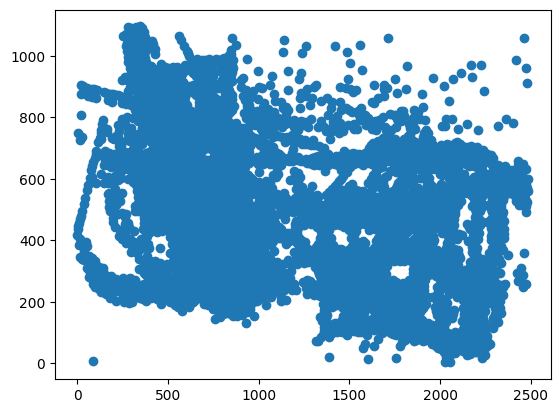

In [12]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*pointsOut))
plt.show()

In [7]:
feet = [float(boxes.xyxy[0][2] - ((boxes.xyxy[0][2] - boxes.xyxy[0][0]) /2)), float(boxes.xyxy[0][1])]
feet

IndexError: index 0 is out of bounds for dimension 0 with size 0

Text(0.5, 1.0, 'Smoothing with  $\\sigma$ = %d')

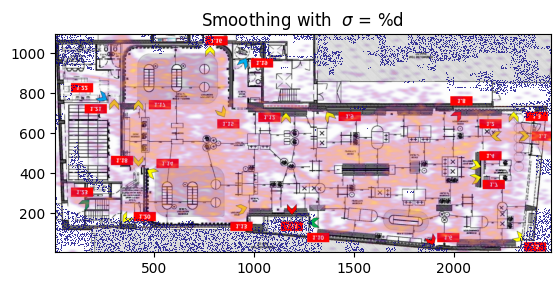

In [16]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
img = plt.imread("grondplan.png")

def myplot(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent

def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"

    mycmap = cmap
    mycmap._init()
    mycmap._lut[:,-1] = np.linspace(0, 0.8, N+4)
    return mycmap

mycmap = transparent_cmap(plt.cm.plasma)

fig, ax = plt.subplots()
ax.imshow(img)
x, y = zip(*pointsOut)
img, extent = myplot(x, y, 5)
# ax.plot(x, y, 'k.', markersize=5, color='red')
ax.imshow(img, extent=extent, origin='lower', cmap=mycmap)
ax.set_title("Smoothing with  $\sigma$ = %5" )

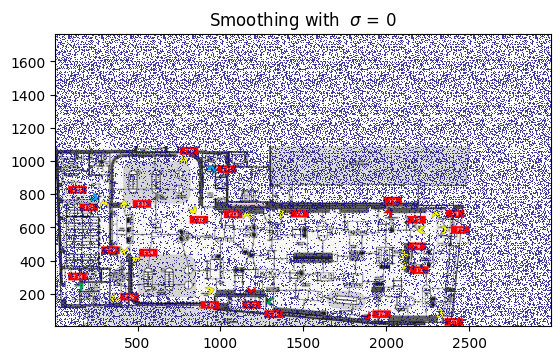

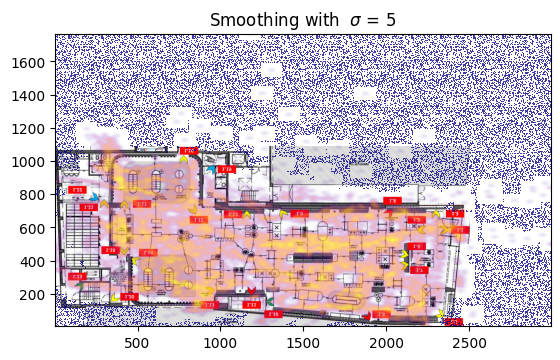

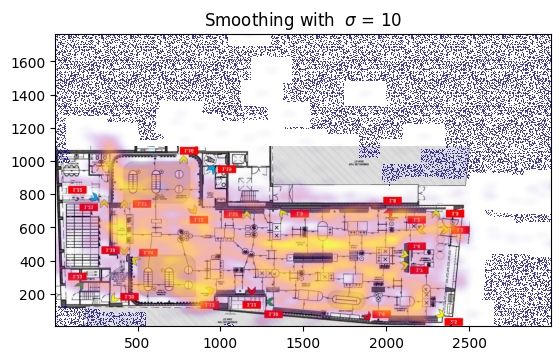

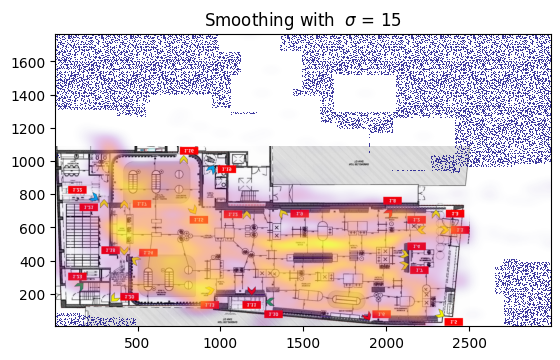

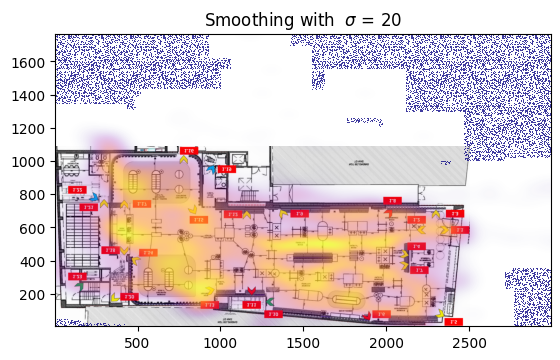

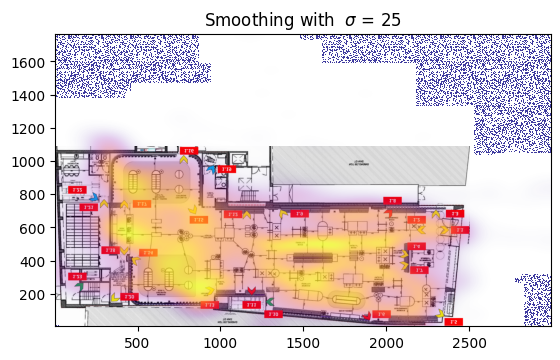

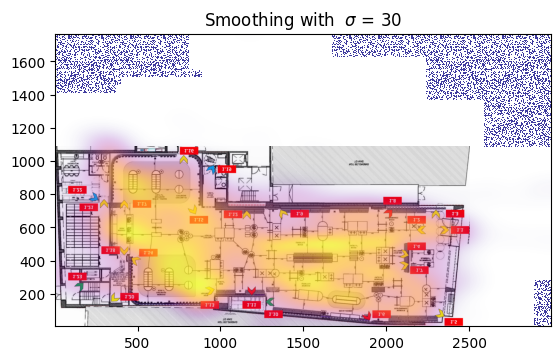

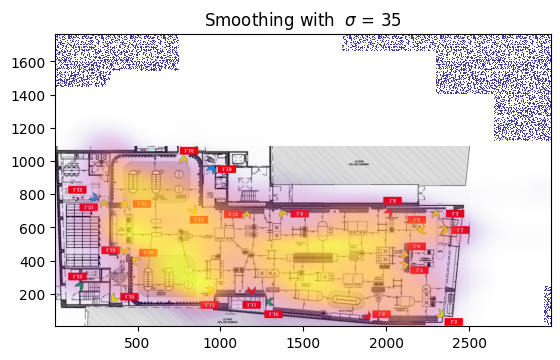

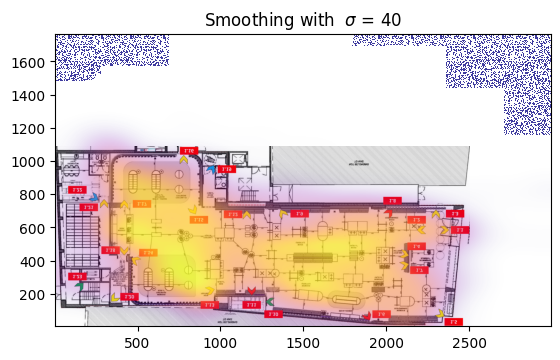

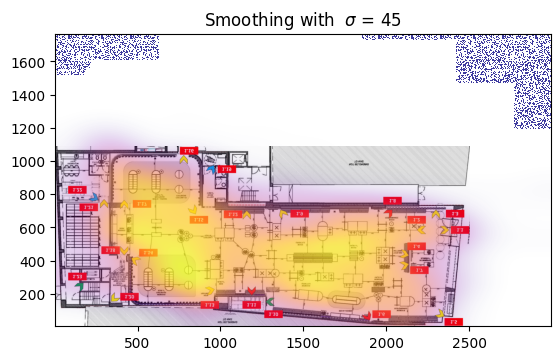

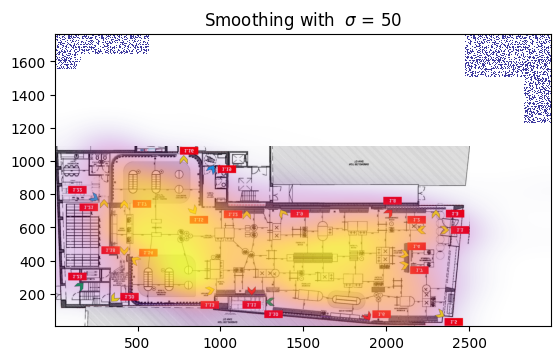

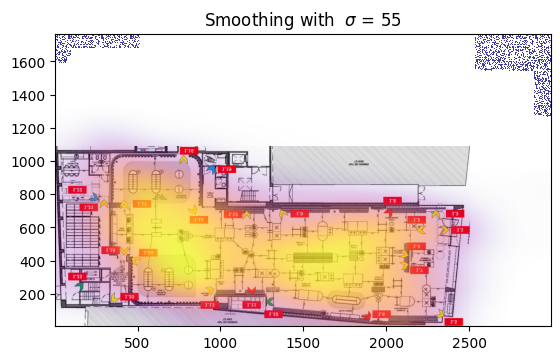

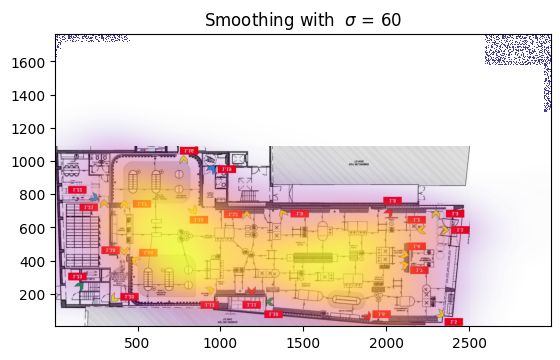

In [50]:

for i in range(0, 65, 5):
    img = plt.imread("groundplan/nike_groundplan.png")
    fig, ax = plt.subplots()
    ax.imshow(img)
    img, extent = myplot(x, y, i)
    # ax.plot(x, y, 'k.', markersize=5, color='red')
    ax.imshow(img, extent=extent, origin='lower', cmap=mycmap)
    ax.set_title(f"Smoothing with  $\sigma$ = {i}" )
    fig.savefig(f"Heatmaps/heatmap_gradient{i}")

In [54]:
import imageio
import os
images = []

for filename in os.listdir("Heatmaps/"):
    images.append(imageio.imread("heatmaps/" + filename))
    print(filename)
imageio.mimsave('GIFS/movie.gif', images)

C:\Users\senne.dierick\AppData\Local\Temp\ipykernel_26836\1071959149.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread("heatmaps/" + filename))


heatmap_gradient0.png
heatmap_gradient05.png
heatmap_gradient10.png
heatmap_gradient15.png
heatmap_gradient20.png
heatmap_gradient25.png
heatmap_gradient30.png
heatmap_gradient35.png
heatmap_gradient40.png
heatmap_gradient45.png
heatmap_gradient50.png
heatmap_gradient55.png
heatmap_gradient60.png


C:\Users\senne.dierick\AppData\Local\Temp\ipykernel_10164\2568531397.py:4: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


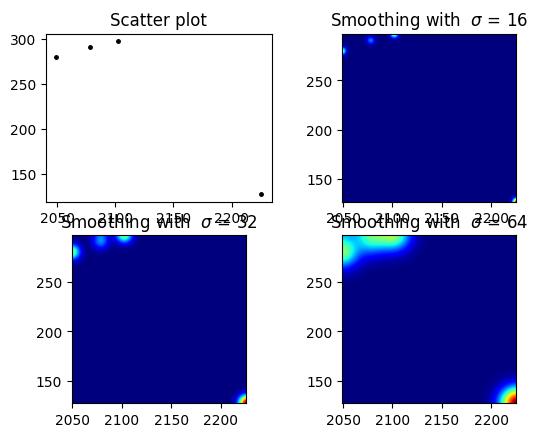

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter


def myplot(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent


fig, axs = plt.subplots(2, 2)

# Generate some test data
x, y = zip(*pointsOut)

sigmas = [0, 16, 32, 64]

for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.plot(x, y, 'k.', markersize=5)
        ax.set_title("Scatter plot")
    else:
        img, extent = myplot(x, y, s)
        ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
        ax.set_title("Smoothing with  $\sigma$ = %d" % s)

plt.show()

In [1]:
import cv2
import sys
from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator
# import nats_client

video_path = "output.mp4"
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error reading video file")
    sys.exit()

model = YOLO('yolov8n.pt')

while cap.isOpened():
    success, frame = cap.read()
   
    if success:
        results = model.predict(frame)
        boxes = results[0].boxes.xywh.cpu()
        clss = results[0].boxes.cls.cpu().tolist()
        names = results[0].names
        
        annotator = Annotator(frame, line_width=2, example=str(names))
        
        for box, cls in zip(boxes, clss):
            annotator.box_label(box, label=names[int(cls)], color=(255, 0, 255))

        # nats_client.publish('message', boxes)
        cv2.imshow("YOLOv8 Detection", frame)

        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()


0: 192x640 3 Persons, 139.4ms
Speed: 3.5ms preprocess, 139.4ms inference, 2.0ms postprocess per image at shape (1, 3, 192, 640)

0: 192x640 4 Persons, 123.9ms
Speed: 2.5ms preprocess, 123.9ms inference, 1.0ms postprocess per image at shape (1, 3, 192, 640)

0: 192x640 3 Persons, 120.4ms
Speed: 2.0ms preprocess, 120.4ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 640)

0: 192x640 3 Persons, 112.7ms
Speed: 1.0ms preprocess, 112.7ms inference, 1.0ms postprocess per image at shape (1, 3, 192, 640)

0: 192x640 3 Persons, 130.0ms
Speed: 2.0ms preprocess, 130.0ms inference, 0.5ms postprocess per image at shape (1, 3, 192, 640)

0: 192x640 3 Persons, 116.3ms
Speed: 2.0ms preprocess, 116.3ms inference, 1.0ms postprocess per image at shape (1, 3, 192, 640)

0: 192x640 3 Persons, 101.7ms
Speed: 3.0ms preprocess, 101.7ms inference, 0.5ms postprocess per image at shape (1, 3, 192, 640)

0: 192x640 3 Persons, 118.8ms
Speed: 2.0ms preprocess, 118.8ms inference, 1.0ms postprocess per 

KeyboardInterrupt: 